# Image Convolution

Convolution is one of the most important operations in signal and image processing. It could operate in 1D (e.g. speech processing), 2D (e.g. image processing) or 3D (video processing).  

useful link: http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

<center>Grayscale value</center>
![alt text](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/7.jpg "Grayscale value")


## Convolution
Each convolution operation has a kernel which could be a any matrix smaller than the original image in height and width. Each kernel is useful for a spesific task, such as sharpening, blurring, edge detection, and etc. 

Let's start with the ```sharpen kernel``` which is defined as: 

**<center>Kernel</center>**
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/beb8b9a493e8b9cf5deccd61bd845a59ea2e62cc "Kernel")

For more kernel operation, please follow this link: https://en.wikipedia.org/wiki/Kernel_(image_processing)  


**<center>Convolution</center>**
![alt text](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/1.JPG "Calculate the value of convolution")

**<center>Convolution calculation</center>**
![alt text](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/3.JPG "Convolution calculation")


**<center>Convolution calculation on borders</center>**
![alt text](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/5.JPG "Convolution calculation on borders")


In [12]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
    
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
        
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x] = (kernel*image_padded[y:y+3,x:x+3]).sum()        
            
    return output

In [34]:
# Read image from url
img = io.imread('http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/image.jpg')   
img = color.rgb2gray(img)   

Sharpen kernel
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Flip kernel 
(left-right, up-down)
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

First 5 columns and rows of the original image matrix: 
[[ 88.  85.  82.  80.  81.]
 [ 88.  85.  88.  85.  84.]
 [ 81.  81.  87.  86.  83.]
 [ 86.  87.  88.  87.  83.]
 [ 86.  90.  85.  86.  83.]]

First 5 columns and rows of the sharpen image matrix: 
[[ 267.  170.  157.  152.  160.]
 [ 186.   83.  101.   87.   86.]
 [ 150.   65.   92.   88.   74.]
 [ 176.   90.   94.   92.   75.]
 [ 172.  105.   79.   91.   77.]]


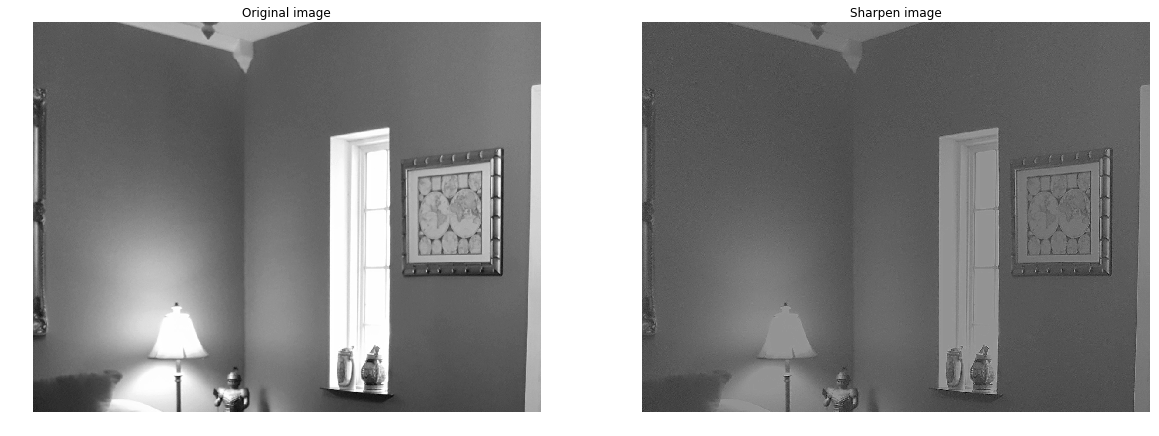

In [35]:
# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img, kernel)

print "Sharpen kernel"
print kernel

print "\nFlip kernel \n(left-right, up-down)"
print np.flipud(np.fliplr(kernel))

print "\nFirst 5 columns and rows of the original image matrix: \n", img[:5,:5]*255
print "\nFirst 5 columns and rows of the sharpen image matrix: \n", image_sharpen[:5,:5]*255

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.title('Sharpen image')
plt.axis('off')

plt.show()

Sharpen kernel
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Flip kernel 
(left-right, up-down)
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

First 5 columns and rows of the original image matrix: 
[[ 131.6451  126.5672  122.0643  119.4893  119.7018]
 [ 128.8576  138.2826  123.0643  143.4893  138.6297]
 [ 135.998   142.423   151.5634  169.0605  139.2009]
 [ 160.6413  161.1384  146.5634  173.9163  147.1288]
 [ 154.3567  154.9221  147.4192  175.1288  151.1288]]

First 5 columns and rows of the sharpen image matrix: 
[[ 402.8007  240.844   241.2007  212.1911  210.119 ]
 [ 238.3623  170.5009   59.9219  167.2027  156.9864]
 [ 248.0681  125.1326  176.7058  237.1326   81.9125]
 [ 351.7134  201.1422   98.7797  231.7     116.2692]
 [ 309.9355  158.9866  117.5596  242.7605  133.9826]]


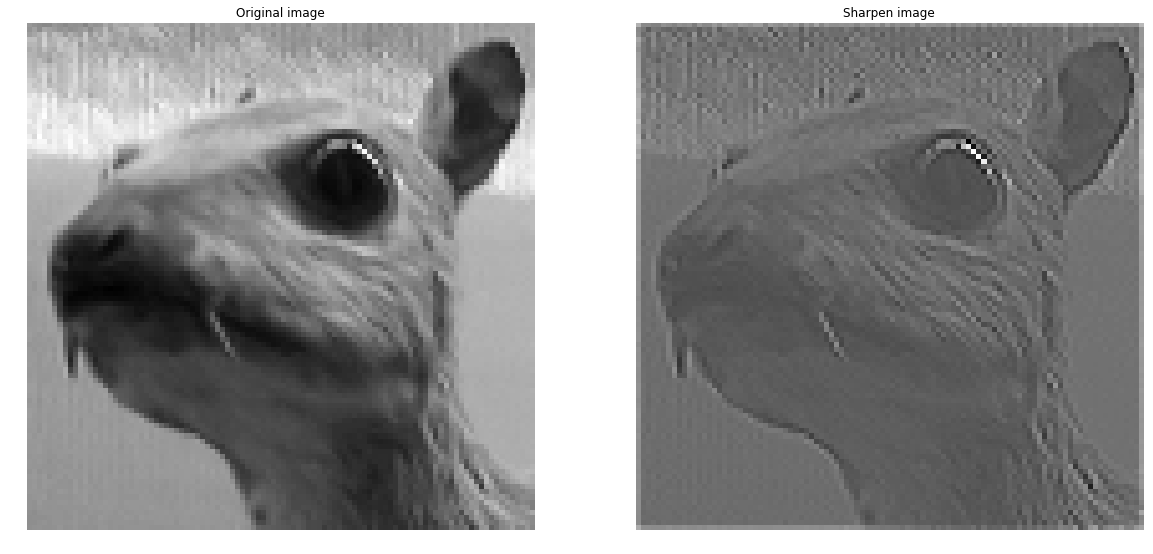

In [36]:
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png')   
img = color.rgb2gray(img) 

# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img, kernel)

print "Sharpen kernel"
print kernel

print "\nFlip kernel \n(left-right, up-down)"
print np.flipud(np.fliplr(kernel))

print "\nFirst 5 columns and rows of the original image matrix: \n", img[:5,:5]*255
print "\nFirst 5 columns and rows of the sharpen image matrix: \n", image_sharpen[:5,:5]*255

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.title('Sharpen image')
plt.axis('off')

plt.show()

### Blur kernel

**<center>Blur kernel</center>**
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/f1e6d5ec15af752f471372b96a1be4a83e02873e "Blur kernel")

In [37]:
# Blur kernel
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
kernel = kernel*(1.0/9.0)

print "Blur kernel"
print kernel

Blur kernel
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


Blur kernel
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]

Flip kernel 
(left-right, up-down)
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]

First 5 columns and rows of the original image matrix: 
[[ 131.6451  126.5672  122.0643  119.4893  119.7018]
 [ 128.8576  138.2826  123.0643  143.4893  138.6297]
 [ 135.998   142.423   151.5634  169.0605  139.2009]
 [ 160.6413  161.1384  146.5634  173.9163  147.1288]
 [ 154.3567  154.9221  147.4192  175.1288  151.1288]]

First 5 columns and rows of the sharpen image matrix: 
[[  58.3725       85.60901111   85.88411111   85.15985556   87.26124444]
 [  89.30816667  133.38505556  137.33376667  136.2515      139.20951111]
 [  96.37121111  143.17022222  149.94457778  148.06851111  151.06637778]
 [ 101.05327778  150.55838889  158.01501111  155.6789      158.02676667]
 [ 103.33918889  151.88415556  157.23767778  

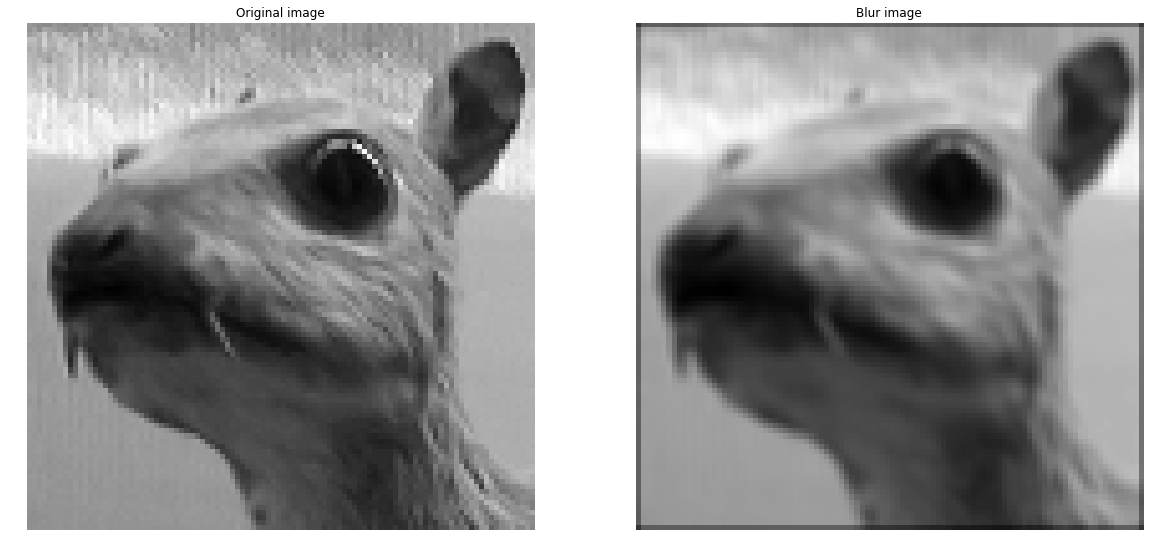

In [38]:
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png')   
img = color.rgb2gray(img)  

# Convolve the sharpen kernel and the image
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
kernel = kernel*(1.0/9.0)
image_blur = convolve2d(img, kernel)

print "Blur kernel"
print kernel

print "\nFlip kernel \n(left-right, up-down)"
print np.flipud(np.fliplr(kernel))

print "\nFirst 5 columns and rows of the original image matrix: \n", img[:5,:5]*255
print "\nFirst 5 columns and rows of the sharpen image matrix: \n", image_blur[:5,:5]*255

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_blur, cmap=plt.cm.gray)
plt.title('Blur image')
plt.axis('off')

plt.show()

Blur kernel
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]

Flip kernel 
(left-right, up-down)
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]

First 5 columns and rows of the original image matrix: 
[[ 131.6451  126.5672  122.0643  119.4893  119.7018]
 [ 128.8576  138.2826  123.0643  143.4893  138.6297]
 [ 135.998   142.423   151.5634  169.0605  139.2009]
 [ 160.6413  161.1384  146.5634  173.9163  147.1288]
 [ 154.3567  154.9221  147.4192  175.1288  151.1288]]

First 5 columns and rows of the sharpen image matrix: 
[[ 138.2826   -5.7933    5.2067   15.5654   -9.7192]
 [  15.8558   25.1462   33.7154  -10.      -20.5692]
 [  22.8558   -8.2846    7.5712  -15.       -9.0683]
 [  12.4991  -22.5029   -6.4308   16.0721  -13.0663]
 [  -8.4288   10.7154   -5.0683    3.6413    1.9279]]


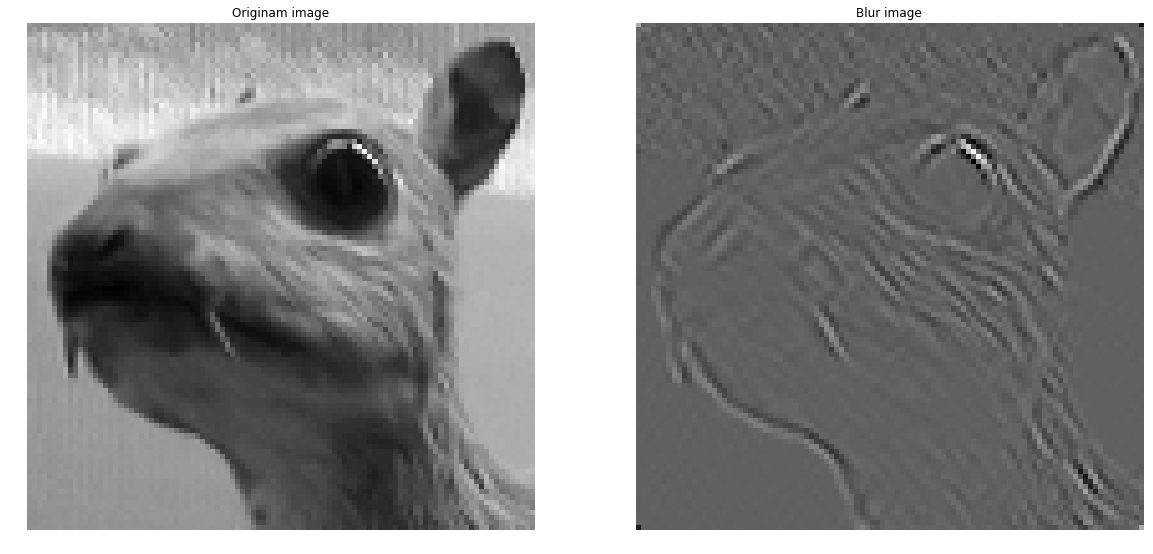

In [87]:
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png')   
img = color.rgb2gray(img)  

# Convolve the sharpen kernel and the image
kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
#kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
image_blur = convolve2d(img, kernel)

print "Blur kernel"
print kernel

print "\nFlip kernel \n(left-right, up-down)"
print np.flipud(np.fliplr(kernel))

print "\nFirst 5 columns and rows of the original image matrix: \n", img[:5,:5]*255
print "\nFirst 5 columns and rows of the sharpen image matrix: \n", image_blur[:5,:5]*255

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Originam image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_blur, cmap=plt.cm.gray)
plt.title('Blur image')
plt.axis('off')

plt.show()

('Threshold value', 11.443281054687516)


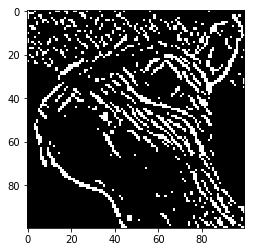


First 5 columns and rows of the sharpen image matrix: 
[[ 138.2826   -5.7933    5.2067   15.5654   -9.7192]
 [  15.8558   25.1462   33.7154  -10.      -20.5692]
 [  22.8558   -8.2846    7.5712  -15.       -9.0683]
 [  12.4991  -22.5029   -6.4308   16.0721  -13.0663]
 [  -8.4288   10.7154   -5.0683    3.6413    1.9279]]

First 5 columns and rows of the sharpen image matrix: 
[[ True False False  True False]
 [ True  True  True False False]
 [ True False False False False]
 [ True False False  True False]
 [False False False False False]]


In [88]:
from skimage import filters

#Global threshold
global_thresh = filters.threshold_otsu(image_blur)
edge_img = image_blur > global_thresh

print("Threshold value", global_thresh*255)
plt.gray()
plt.imshow(edge_img)
plt.show()

print "\nFirst 5 columns and rows of the sharpen image matrix: \n", image_blur[:5,:5]*255
print "\nFirst 5 columns and rows of the sharpen image matrix: \n", edge_img[:5,:5]

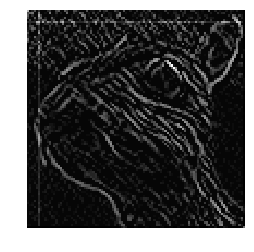

In [89]:
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(image_blur/np.max(np.abs(image_blur)), clip_limit=0.03)
plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
plt.axis('off')
plt.show()

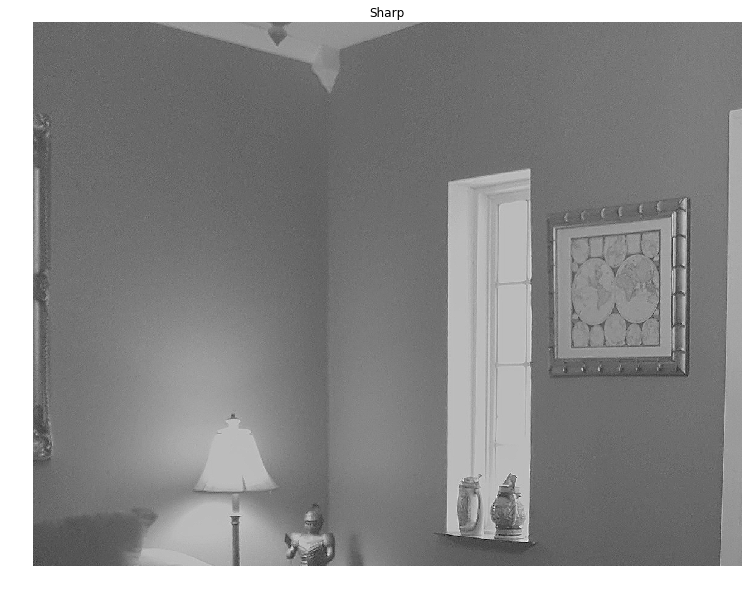

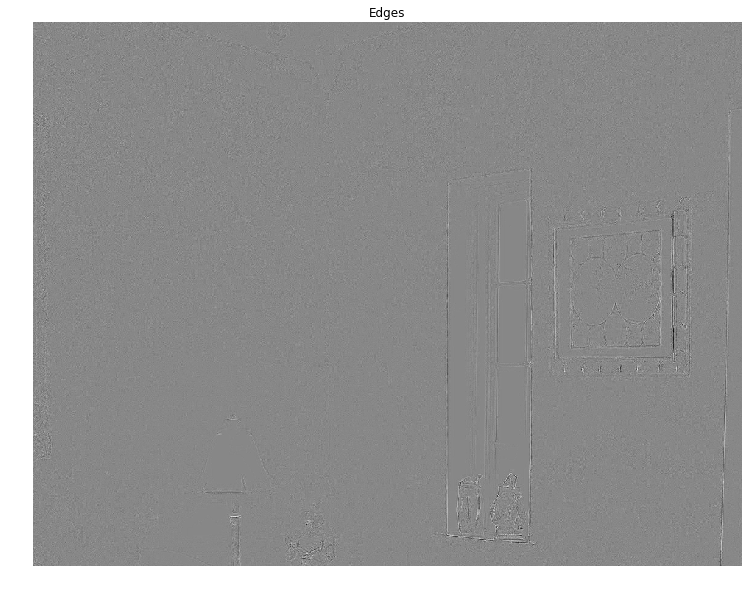

In [96]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/image.jpg')   
img = color.rgb2gray(img)   

# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')

plt.figure(figsize=(20,10))
plt.imshow(image_sharpen, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.title('Sharp')
plt.axis('off')
plt.show()

# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')

plt.figure(figsize=(20,10))
plt.imshow(edges, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.title('Edges')
plt.axis('off')
plt.show()

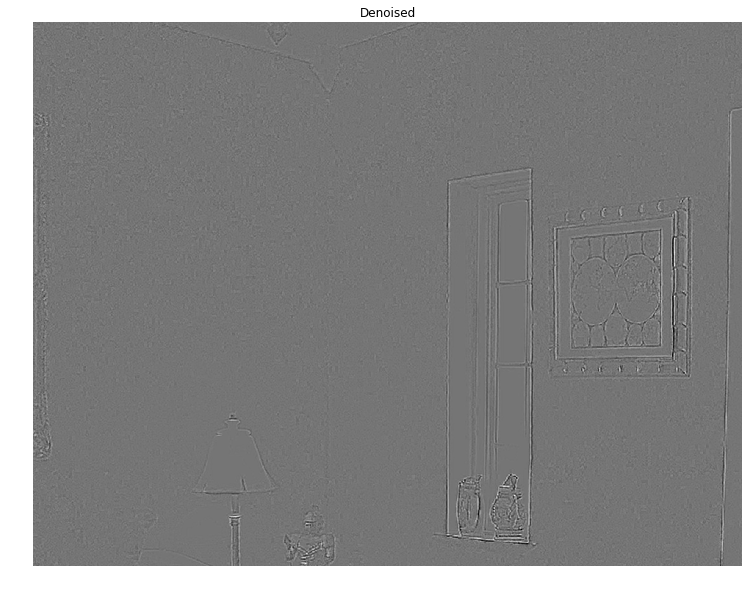

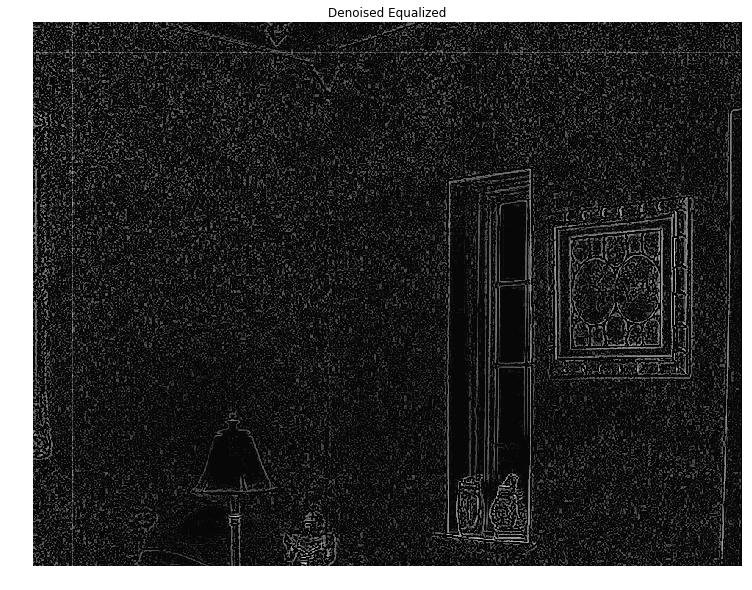

In [97]:
# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')

plt.figure(figsize=(20,10))
plt.imshow(denoised, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.title('Denoised')
plt.axis('off')
plt.show()


# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)
plt.figure(figsize=(20,10))
plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.title('Denoised Equalized')
plt.axis('off')
plt.show()